The aim of our study is to answer the below research questions:
- a) Does price vary with Airlines?
- b) How is the price affected when tickets are bought in just 1 or 2 days before departure?
- c) Does ticket price change based on the departure time and arrival time?
- d) How the price changes with change in Source and Destination?
- e) How does the ticket price vary between Economy and Business class?

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [76]:
df = pd.read_csv('/kaggle/input/flight-price-prediction/Clean_Dataset.csv')

In [77]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [79]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [80]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [81]:
df.duplicated().sum()

0

Find out the cities where flights depart from and arrive,along with the airlines flying these routes.

In [82]:
features = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'stops', 'class']

for feature in features:
    print(f'{feature}:', df[feature].unique())

airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
source_city: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
destination_city: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
arrival_time: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
stops: ['zero' 'one' 'two_or_more']
class: ['Economy' 'Business']


In [83]:
df['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

# Visualization

Visualize to identify which airline has the highest number of flights.

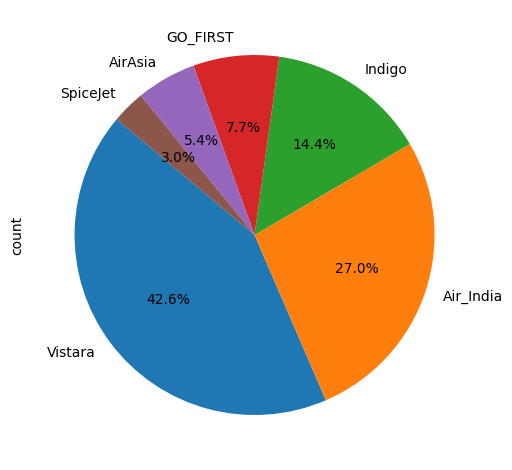

In [84]:
sizes = df['airline'].value_counts()
sizes.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.tight_layout()

- Vistara operates 42.6% of flights, showcasing its dominance dominance in the airline market.
- Spicejet accounts for only 3% of the total flights, representing a smaller presence in the market

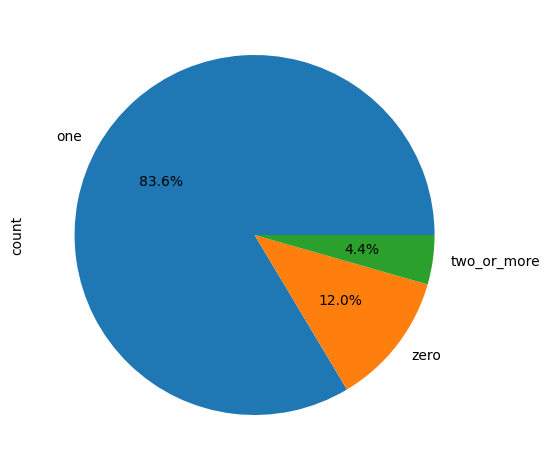

In [85]:
sizes = df['stops'].value_counts()
sizes.plot(kind='pie', autopct='%1.1f%%')
plt.tight_layout()

Most flights, about 83%, have one stop, while 12% have no stops, and 4.4% have two or more stops.

# How does price vary with Airlines.

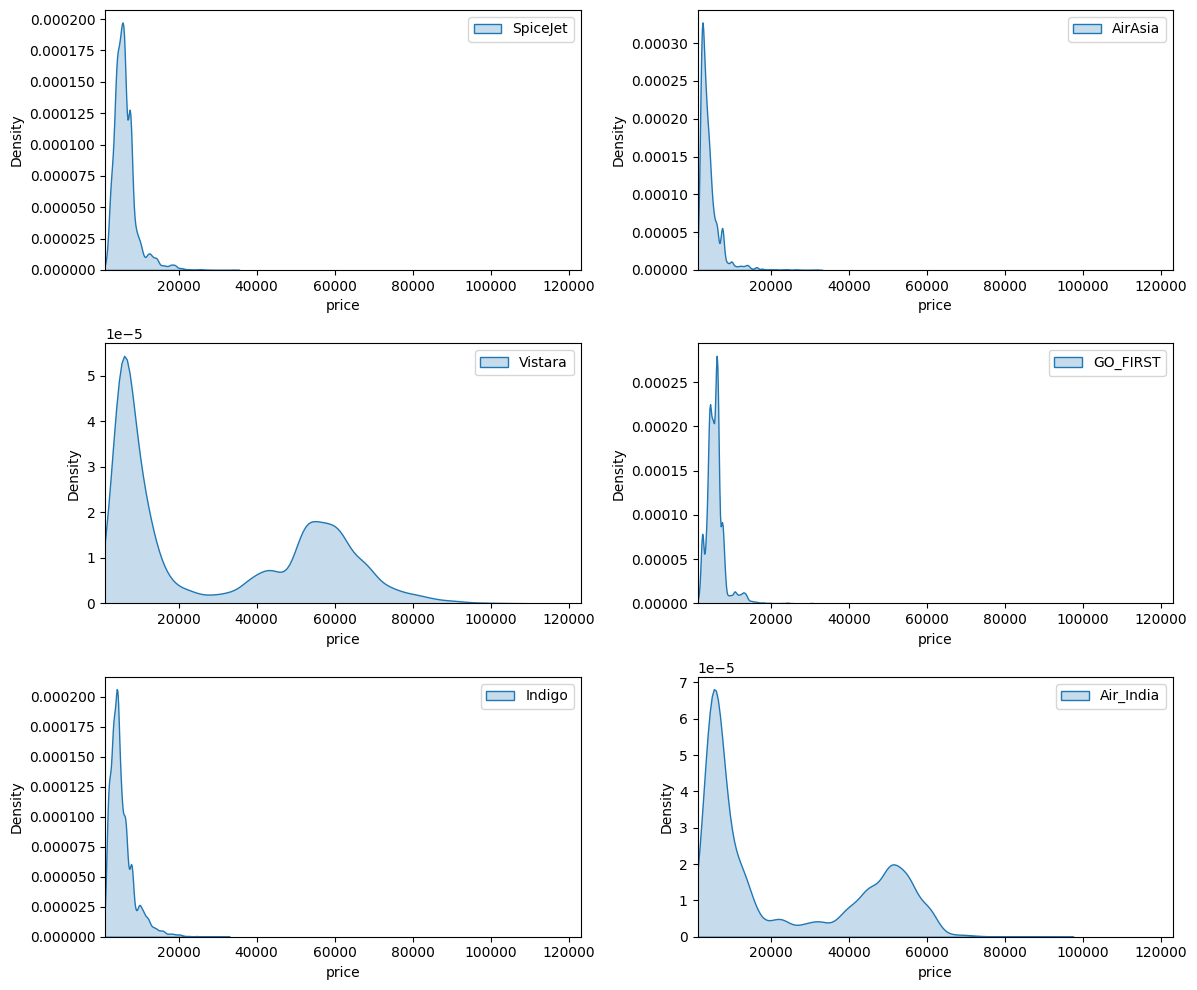

In [86]:
import seaborn as sns
from matplotlib.ticker import MultipleLocator

fig, axes = plt.subplots(3,2, figsize=(12,10))

# Set the same range for x-axis across all plots
price_range = (min(df['price']), max(df['price']))

airlines = df['airline'].unique()
for i, airline in enumerate(airlines):
    airline_df = df[df['airline'] == airline]   
    sns.kdeplot(data=airline_df, x='price',fill=True, ax=axes[i//2][i%2], label=airline)
    axes[i//2][i%2].set_xlim(price_range)
    axes[i//2][i%2].legend()
    
plt.tight_layout()
    

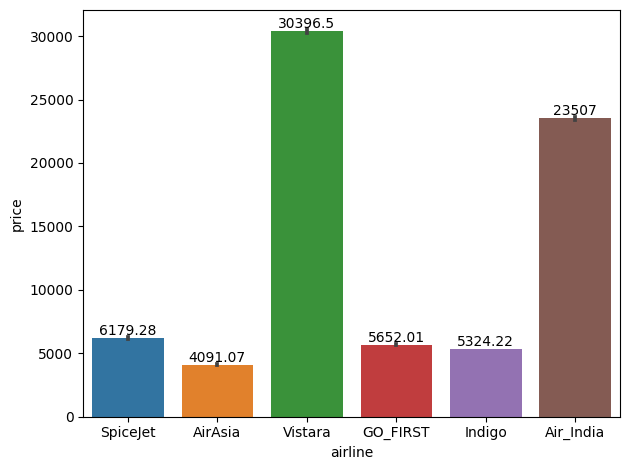

In [87]:
import seaborn as sns

# No need to calculate the mean separately, as the bar plot can calculate it for us.
ax = sns.barplot(data=df, x='airline',y='price', label=airline, estimator='mean')
ax.bar_label(ax.containers[0], fontsize=10)
plt.tight_layout()

Findings - 
- The plots reveal a significant number of tickets priced above 20k for Visatara and Air_India. Let's explore the underlying reasons behind this trend. <br>
 Should examine the availability of business class and economy class seats offered by these airlines. Discrepancies in ticket prices could potentially stem from higher pricing in the business class section compared to the economy class. <br>
- Business class tickets usually cost more than economy class tickets.

In [88]:
for airline in airlines:
    class_counts = df[df['airline'] == airline]['class'].value_counts()
    print(airline)
    for class_type, count in class_counts.items():
        print(f"{class_type}: {count}" , end='\n')
    print("---")

SpiceJet
Economy: 9011
---
AirAsia
Economy: 16098
---
Vistara
Economy: 67270
Business: 60589
---
GO_FIRST
Economy: 23173
---
Indigo
Economy: 43120
---
Air_India
Economy: 47994
Business: 32898
---


The substantial ticket price fluctuations in flights operated by Visatara and Air_India are largely attributed to the exclusive availability of business class seating offered solely by these airlines. <br> 
This factor significantly contributes to the higher mean prices observed for both airlines.

# How is the price affected when tickets are bought in just 1 or 2 days before departure?

In [89]:
days_price_mean = df.groupby('days_left')['price'].mean()

Text(0, 0.5, 'Avg Price')

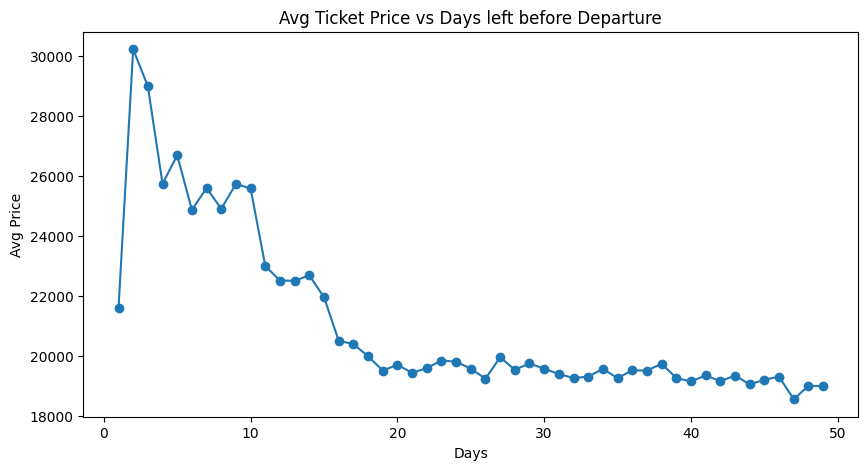

In [90]:
plt.figure(figsize=(10,5))
plt.plot(days_price_mean.index, days_price_mean.values, 'o-')
plt.title('Avg Ticket Price vs Days left before Departure')
plt.xlabel('Days')
plt.ylabel('Avg Price')

Finding of graph: <br>
. Ticket prices tend to decrease one day before the event, followed by an increase two days prior. Subsequently, prices continue to decrease as the number of days remaining increases.

# Does ticket price change based on the departure time?

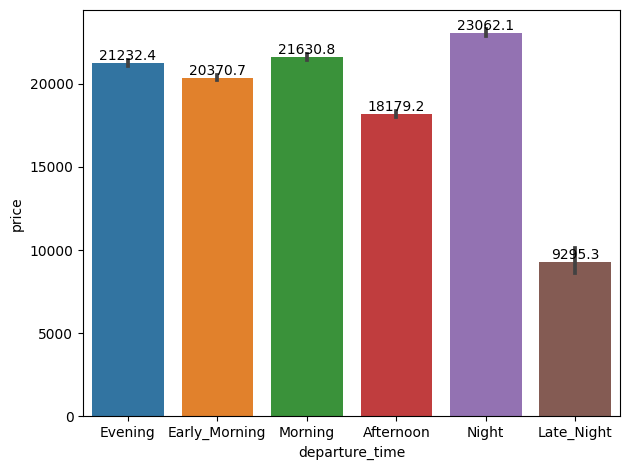

In [91]:
ax = sns.barplot(data=df, x='departure_time',y='price', label=airline, estimator='mean')
ax.bar_label(ax.containers[0], fontsize=10)
plt.tight_layout()

Observations from the graph reveal distinct pricing trends:

- Night flights are most expensive. <br>
- Late-night flights are the least expensive with prices less than half of those for night flights.<br>
- Morning , Early morning, and Evening flights show similar pricing patterns, with a marginal difference of 1k between them.
- Considering these trends, opting for a late-night flight could be a cost-effective choice for your next trip.

# Does ticket price change based on the Arrivial time?

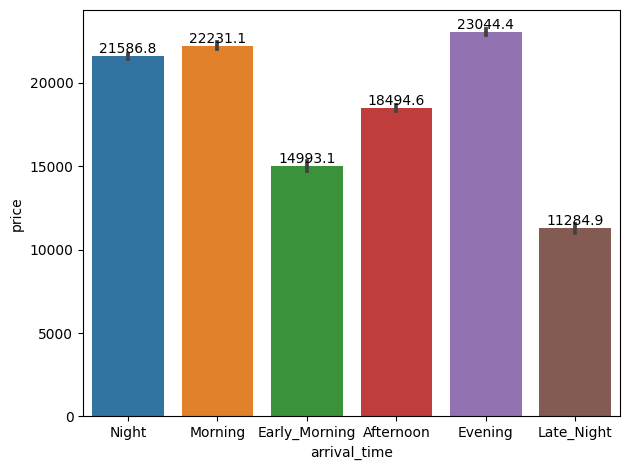

In [92]:
ax = sns.barplot(data=df, x='arrival_time',y='price', label=airline, estimator='mean')
ax.bar_label(ax.containers[0], fontsize=10)
plt.tight_layout()

Findings:
- Late-night arriving flights are the least expensive.
- Evening flights are the most expensive, costing more than double compared to late-night arrivals.
- Early morning and late-night arriving flights are cheaper than others.
- Night and morning arriving flights have similar prices. <br>

- If your priority is to minimize costs, opting for a late-night arriving flight would be the most economical choice


# How the price changes with change in Source?

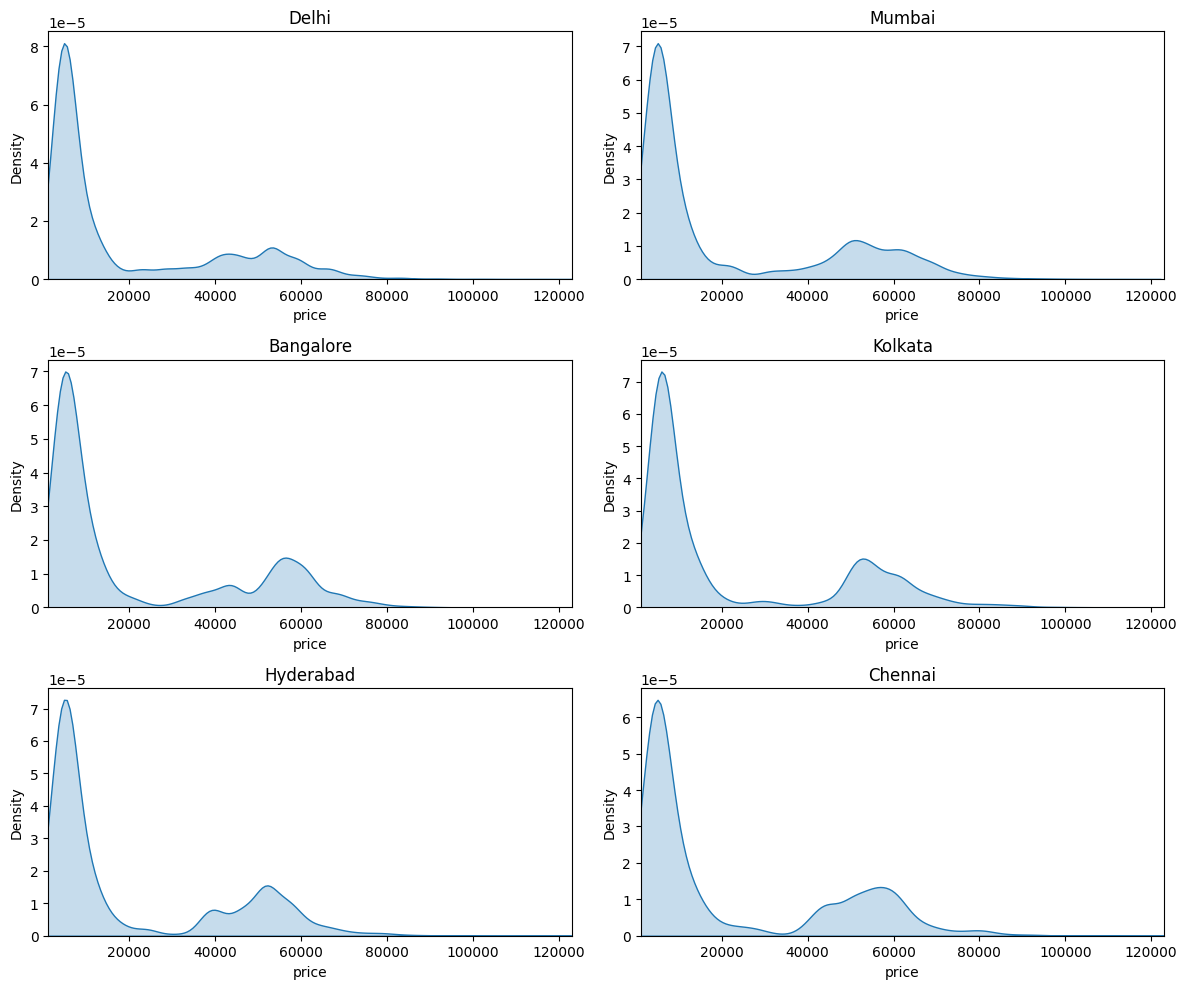

In [93]:
fig, axes = plt.subplots(3,2, figsize=(12,10))

source_cities = df['source_city'].unique()
for i, city in enumerate(source_cities):
    city_df = df[df['source_city'] == city]   
    sns.kdeplot(data=city_df, x='price',fill=True, ax=axes[i//2][i%2])
    axes[i//2][i%2].set_xlim(price_range)
    axes[i//2][i%2].set_title(city)
    
plt.tight_layout()

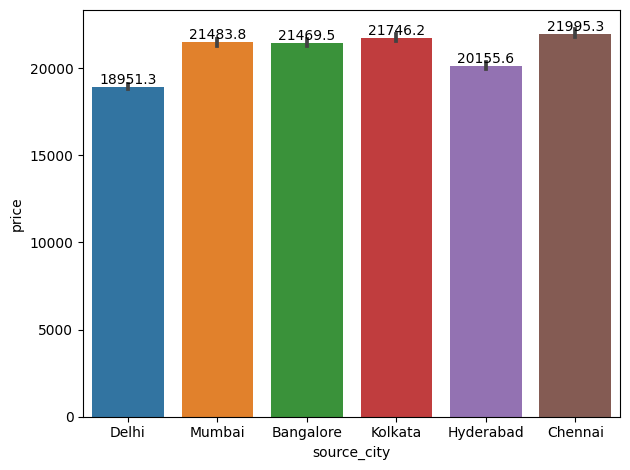

In [94]:
ax = sns.barplot(data=df, x='source_city',y='price', label=airline, estimator='mean')
ax.bar_label(ax.containers[0], fontsize=10)
plt.tight_layout()

- Flight prices vary across different cities. Some cities offer cheaper flights, while others have more expensive ones. This could be because of different types of seats available, with business class seats costing more and standard seats being cheaper.
- Departing flights from Mumbai, Bangalore, Chennai, and Kolkata have similar prices.
- Flights departing from Delhi are slightly cheaper, costing approximately 2k less than the others.

# How the price changes with change in Destination?

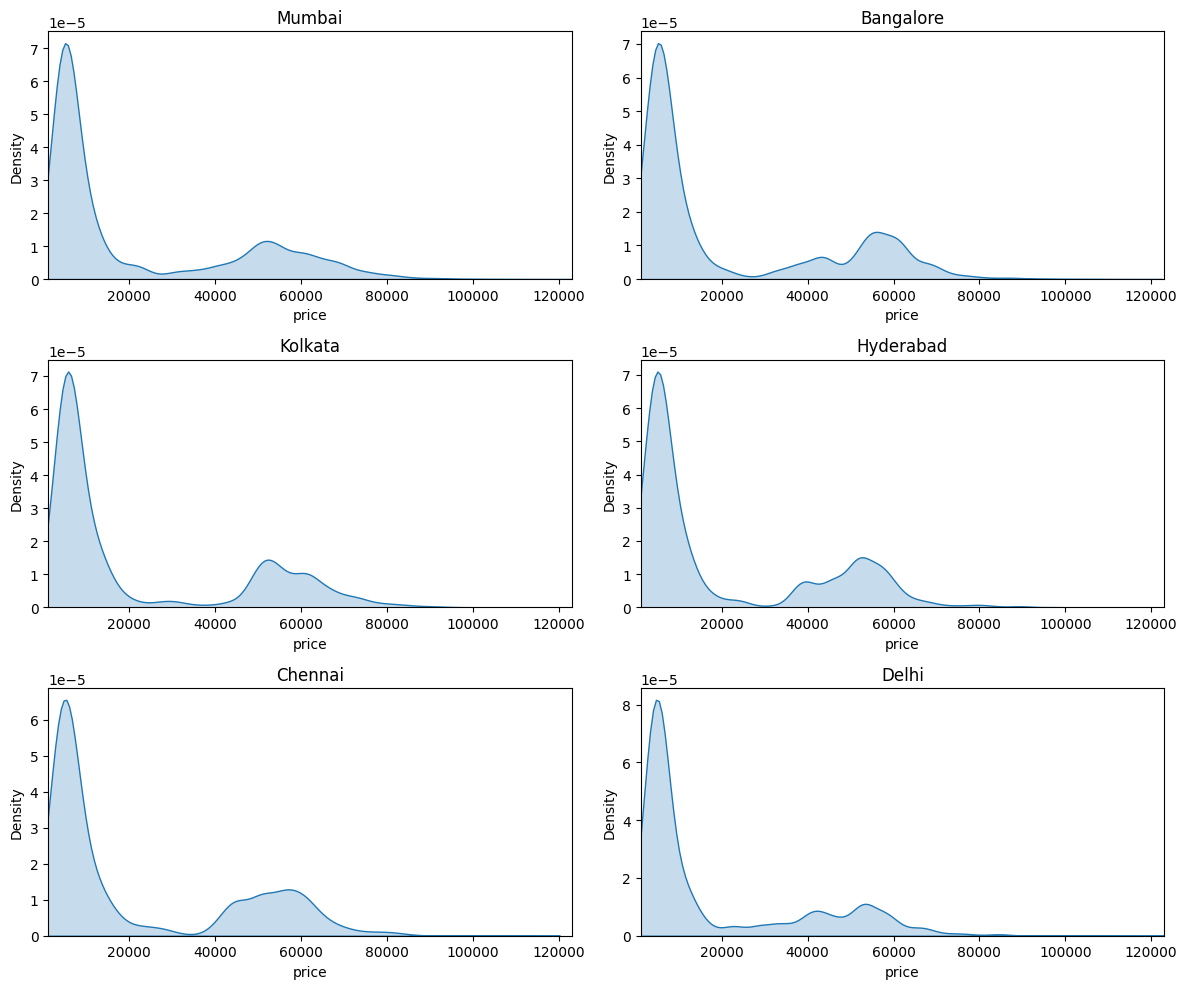

In [95]:
fig, axes = plt.subplots(3,2, figsize=(12,10))

destination_cities = df['destination_city'].unique()
for i, city in enumerate(destination_cities):
    city_df = df[df['destination_city'] == city]   
    sns.kdeplot(data=city_df, x='price',fill=True, ax=axes[i//2][i%2])
    axes[i//2][i%2].set_xlim(price_range)
    axes[i//2][i%2].set_title(city)
    
plt.tight_layout()

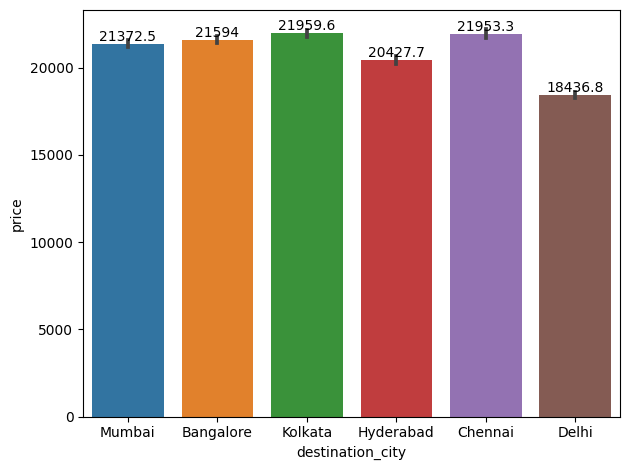

In [96]:
ax = sns.barplot(data=df, x='destination_city',y='price', label=airline, estimator='mean')
ax.bar_label(ax.containers[0], fontsize=10)
plt.tight_layout()

"Findings:
- Arriving flights to Mumbai, Bangalore, Chennai, and Kolkata show similar pricing.
- Flights arriving in Delhi are slightly cheaper."

# How does the ticket price vary between Economy and Business class?

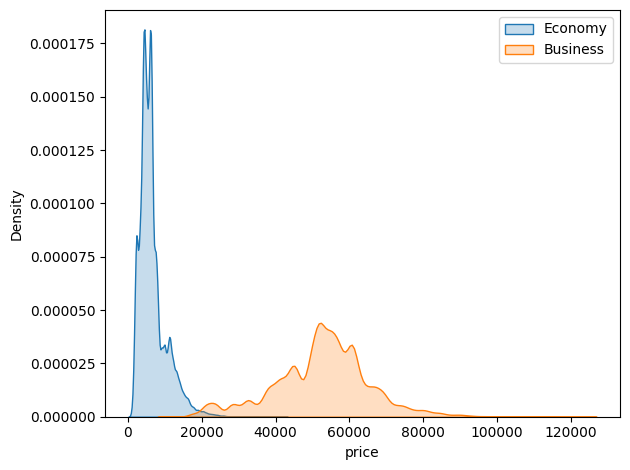

In [97]:
flight_classes = df['class'].unique()
for i, flight_class in enumerate(flight_classes):
    class_df = df[df['class'] == flight_class]   
    sns.kdeplot(data=class_df, x='price',fill=True, label=flight_class)

plt.tight_layout()
plt.legend()

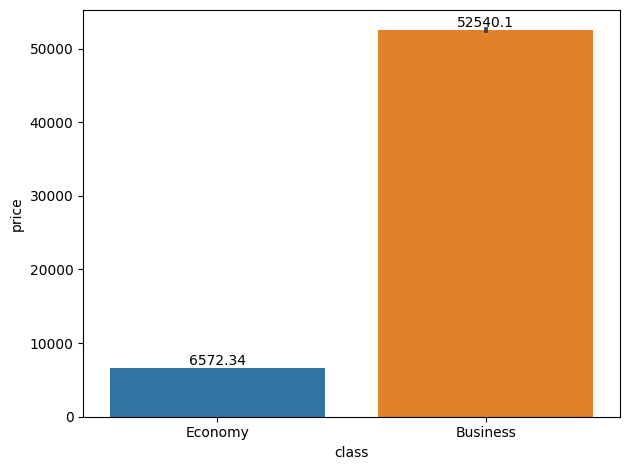

In [98]:
ax = sns.barplot(data=df, x='class',y='price', label=airline, estimator='mean')
ax.bar_label(ax.containers[0], fontsize=10)
plt.tight_layout()

Findings: 
- Business class flight on average are near to 8 times expensive than Economy class.
- These findings show big differences in prices between the two passenger classes, which have a big effect on ticket prices.

PS: Thank you for taking the time to explore my notebook! If you found it helpful or insightful, I would greatly appreciate your support through an upvote.